In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve
import plotly.graph_objects as go

In [ ]:
f = lambda x: 2*x**2 - x**3
g = lambda x: math.e**-x + 11.1
h = lambda x: math.sin(x) * math.cos(x)

In [ ]:
class MQ:
  def __init__(self):
    self.alfas = []

  def fit_exp(self, x, y):
    self.alfas=[]
    lnY = np.log(y)
    self.fit(x, lnY, [lambda x:1, lambda x:x])
    self.alfas[0] = math.e**self.alfas[0]
    self.alfas[1] =- self.alfas[1]

  def fit(self,x,y,G):
    self.G=G
    A=[]
    B=[]
    j=0
    for g_lin in G:
      b=0
      for i in range(0,len(x)):
        b+=g_lin(x[i])*y[i]
      B.append(b)
      A.append([])
      for g_col in G:
        a=0
        for i in range(0,len(x)):
          a+=g_lin(x[i])*g_col(x[i])
        A[j].append(a)
      j+=1

    mat = np.append(A, np.array([B]).T,axis=1)
    self.alfas = solve(A, B)

  def calc(self, x):
    s = 0
    for i in range(0,len(self.G)):
      s+=self.alfas[i]*self.G[i](x)
    return s
  
  def calc_exp(self, x):
    return self.alfas[0]*(math.e**(-self.alfas[1]*x))

In [ ]:
# a = inicio, b = fim, m = iteração
def trapezios(f, a, b, m):
  H = b-a
  h = H/m
  sum = f(a)+f(b)
  sum_aux= 0
  for i in range(1, m):
    sum_aux+=f(a+i*h)
  sum += 2*sum_aux
  sum*=h/2
  return sum

In [ ]:
def trapeziosModify(a, b, m):
  H = b-a
  h = H/m
  sum = mq.calc(a)+mq.calc(b)
  sum_aux= 0
  for i in range(1, m):
    sum_aux+=mq.calc(a+i*h)
  sum += 2*sum_aux
  sum*=h/2
  return sum

In [ ]:
def intervalo(f, start, end, points):
  p = 1e-10
  x = np.linspace(start, end, points)
  result = []
  for e in x:
    result.append(trapezios(f, e, e+p, 10000))
  return result

In [ ]:
def intervaloModify(start, end, points):
  p = 1e-10
  x = np.linspace(start, end, points)
  result = []
  for e in x:
    result.append(trapeziosModify(e, e+p, 10000)*10000000000)
  return result

#Função F

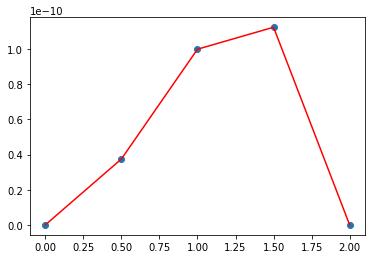

In [ ]:
mq = MQ()
X = np.linspace(0,2,5)
Y = intervalo(f,0,2,5)
mq.fit(X,Y,[lambda x:x**3, lambda x:x**2])

x_line = np.linspace(0, 2, 5)
y_line = list(map(lambda x: mq.calc(x), x_line))

plt.scatter(X,Y)
plt.plot(x_line, y_line, color="red")
plt.show()

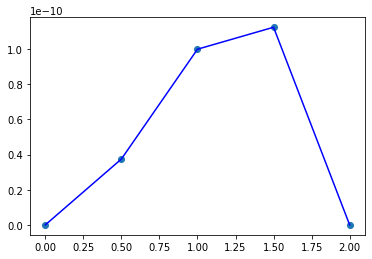

In [ ]:
X2 = np.linspace(0, 2, 5)
Y2 = intervaloModify(0,2,5)
plt.scatter(X2,Y2)

plt.plot(x_line, y_line, color="blue")
plt.show()

#Função G

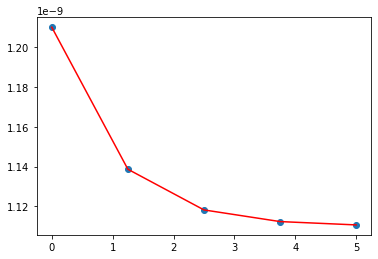

In [ ]:
mq = MQ()
X = np.linspace(0,5,5)
Y = intervalo(g,0,5,5)
mq.fit(X,Y,[lambda x:math.e**-x, lambda x:1])

x_line = np.linspace(0, 5, 5)
y_line = list(map(lambda x: mq.calc(x), x_line))

plt.scatter(X,Y)
plt.plot(x_line, y_line, color="red")
plt.show()

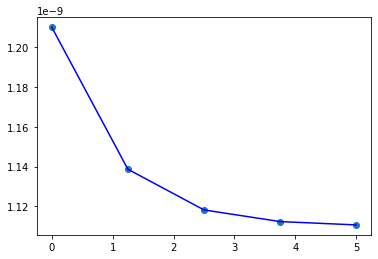

In [ ]:
X2 = np.linspace(0,5,5)
Y2 = intervaloModify(0,5,5)
plt.scatter(X2,Y2)

plt.plot(x_line, y_line, color="blue")
plt.show()

#Função H

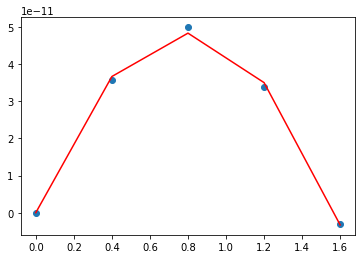

In [ ]:
mq = MQ()
X = np.linspace(0,1.6,5)
Y = intervalo(h,0,1.6,5)
mq.fit(X,Y,[lambda x:-x**2, lambda x:x])

x_line = np.linspace(0, 1.6, 5)
y_line = list(map(lambda x: mq.calc(x), x_line))

plt.scatter(X,Y)
plt.plot(x_line, y_line, color="red")
plt.show()

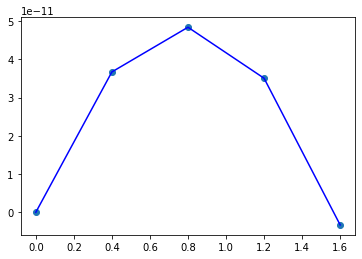

In [ ]:
X2 = np.linspace(0,1.6,5)
Y2 = intervaloModify(0,1.6,5)
plt.scatter(X2,Y2)

plt.plot(x_line, y_line, color="blue")
plt.show()